### Support Vector Regression (less common model)

In [30]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [31]:
# Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [32]:
# Splitting the dataset into the Training set and Test set
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

# Feature Scaling - WE ACTUALLY NEED TO APPLY THIS BECAUSE NOT TAKEN CARE OF BY LIBRARY
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)
#we get warning because ints are converted to floats during scaling

In [33]:
# Fitting the SVR Model to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf') #we want rbf kernel b/c we know we don't want linear (and rbf is common & gaussian)
regressor.fit(X, y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [34]:
# Predicting a new result
#we need to transform new input
y_pred = regressor.predict(sc_X.transform(np.array([[6.5]]))) #expected input to be an array (matrix, not vector therefore two brackets)

#now need to do inverse transform of prediction (using sc_y !!)
y_pred = sc_y.inverse_transform(y_pred)
print(y_pred)

[ 170370.0204065]


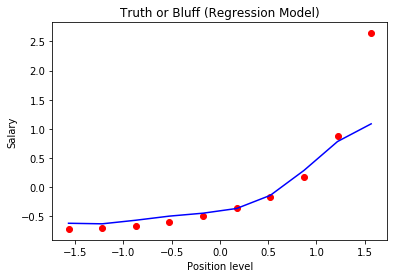

In [35]:
# Visualising the SVR results
%matplotlib inline
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Truth or Bluff (Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

Since CEO observation point is so different from other observation points, the SVR regression model treats it as an outlier

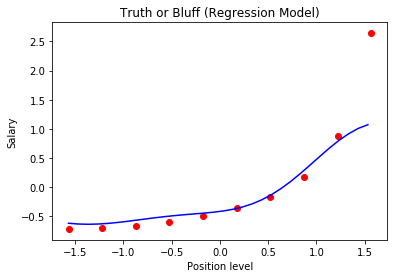

In [36]:
# Visualising the SVR results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()